In [1]:
import pandas as pd

dfSolutions = pd.read_csv("data/solutions.csv")

In [2]:
time = dfSolutions.time_left

In [3]:
time.head(10)

0    2343.0
1    2329.0
2    2366.0
3    2362.0
4    2345.0
5    2242.0
6    2311.0
7    2314.0
8    2328.0
9    2337.0
Name: time_left, dtype: float64

In [4]:
dfSolutions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          205 non-null    int64  
 1   problem_id  205 non-null    int64  
 2   subject_id  205 non-null    int64  
 3   start       205 non-null    int64  
 4   stop        199 non-null    float64
 5   time_left   199 non-null    float64
 6   answer      199 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 11.3+ KB


In [5]:
dfSolutions = dfSolutions.dropna()

In [6]:
type(dfSolutions.subject_id.values)

numpy.ndarray

In [7]:
dfSolutions["subject_id"] = dfSolutions["subject_id"].astype("category")

In [8]:
dfSolutions["stop"][5]

1304095270.0

In [9]:
dfSolutions.iloc[5, 3]

1304095131

In [10]:
dfsolutions_numeric = dfSolutions.select_dtypes(include=["int64", "float64"])

In [11]:
means = []
for col in dfsolutions_numeric.columns:
    means.append(dfsolutions_numeric[col].mean())

In [12]:
dfSolutions["time"] = dfSolutions["time_left"] > 2200

In [13]:
dfsolutions_1 = dfSolutions[dfSolutions["problem_id"] > 200]

In [14]:
dfsolutions_2 = dfSolutions.sort_values(by="subject_id")


In [15]:
dfSolutions["time_left"].describe()

count     199.000000
mean     1124.768844
std       718.462716
min        17.000000
25%       468.000000
50%      1061.000000
75%      1776.500000
max      2366.000000
Name: time_left, dtype: float64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='answer', ylabel='time_left'>

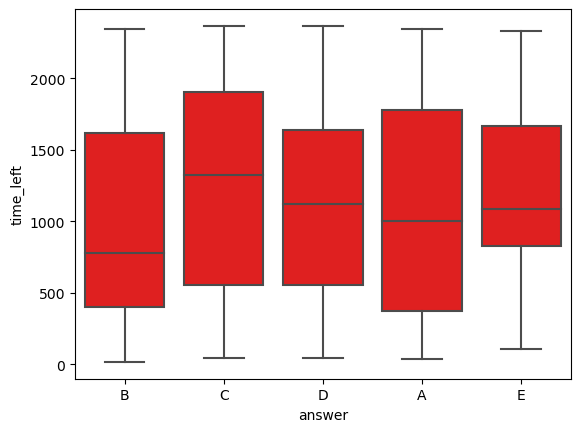

In [17]:
sns.boxplot(data=dfSolutions, x="answer", y="time_left", color="red")

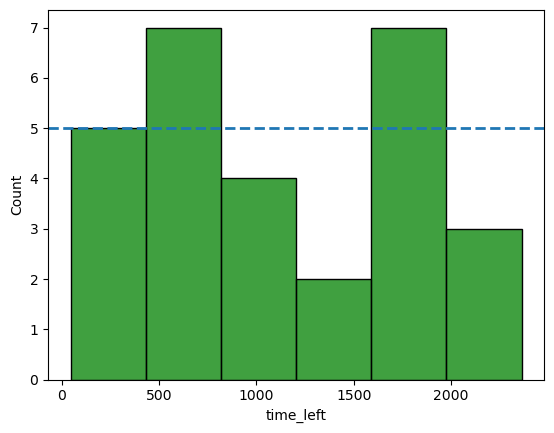

In [18]:
sns.histplot(data=dfSolutions[dfSolutions["subject_id"] == 23], x="time_left", color="green")

plt.axhline(y=5, linewidth=2, linestyle="dashed")

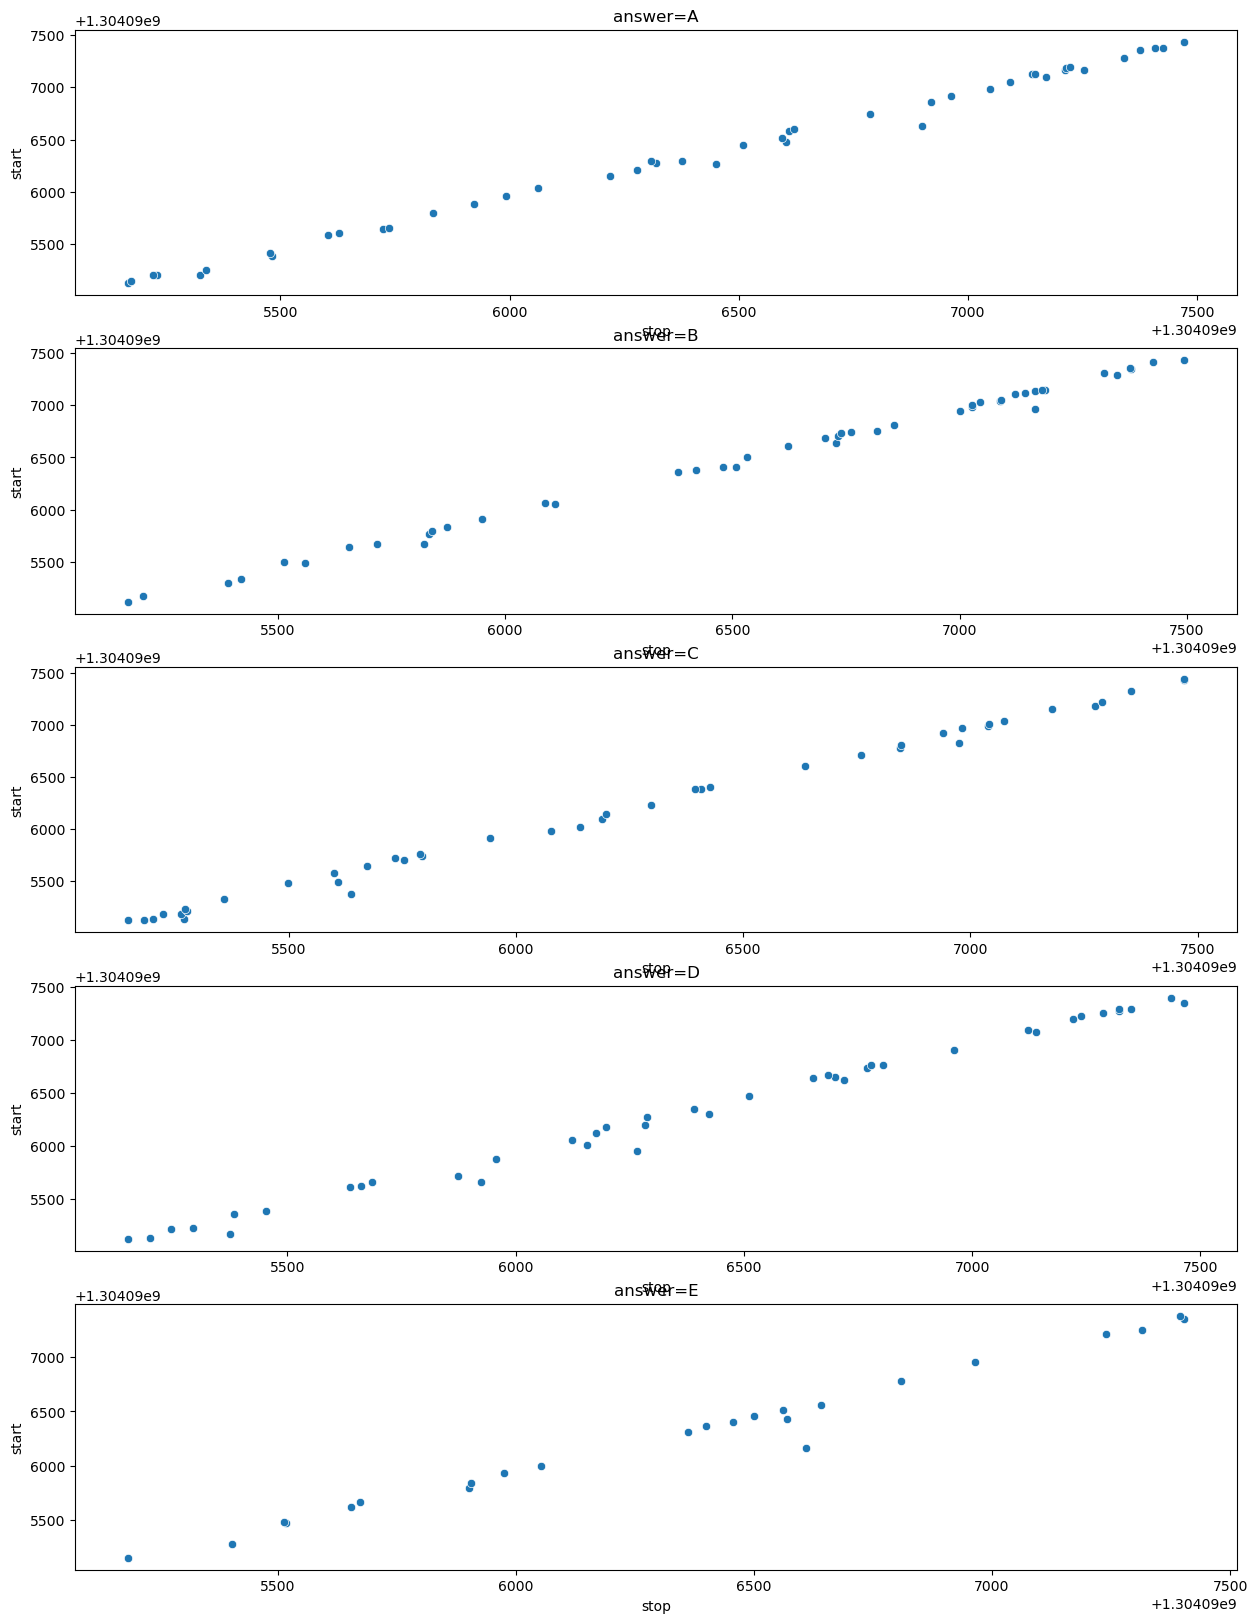

In [23]:
fig, axes = plt.subplots(5, 1, figsize=(15, 20))

for i, (name, group) in enumerate(dfSolutions.groupby("answer")):
    # dfSolutions_filtered = dfSolutions[dfSolutions["answer"] == j]
    dfSolutions_filtered = group
    a = sns.scatterplot(data=dfSolutions_filtered, x="stop", y="start", ax=axes[i])

    axes[i].set_title(f"answer={name}")

plt.show()

<AxesSubplot:xlabel='start', ylabel='stop'>

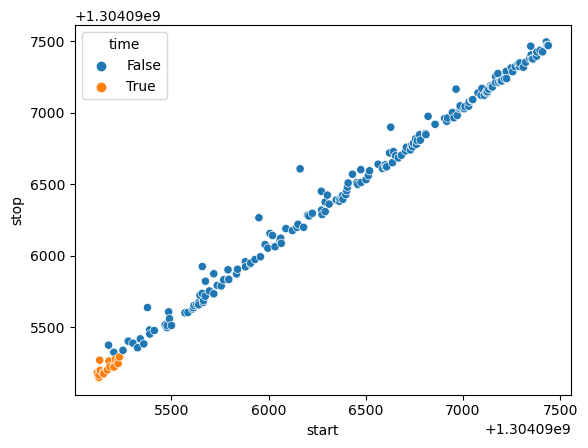

In [47]:
sns.scatterplot(data=dfSolutions, x="start", y="stop", hue="time")

In [37]:
def arange(min,max, step = 1):
    f = []
    elements = (max - min) / step
    for i in range(int(elements) + 1):
        f.append(step * i)
    return f

def funkcia(c, d, n):
    f = arange(1, n + 1, 0.5)

    for i in range(len(f)):
        if f[i] == c:
            f[i] = "A"
        elif f[i] == d:
            f[i] = "B"

    return f

print(funkcia(1, 2, 10))

[0.0, 0.5, 'A', 1.5, 'B', 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]


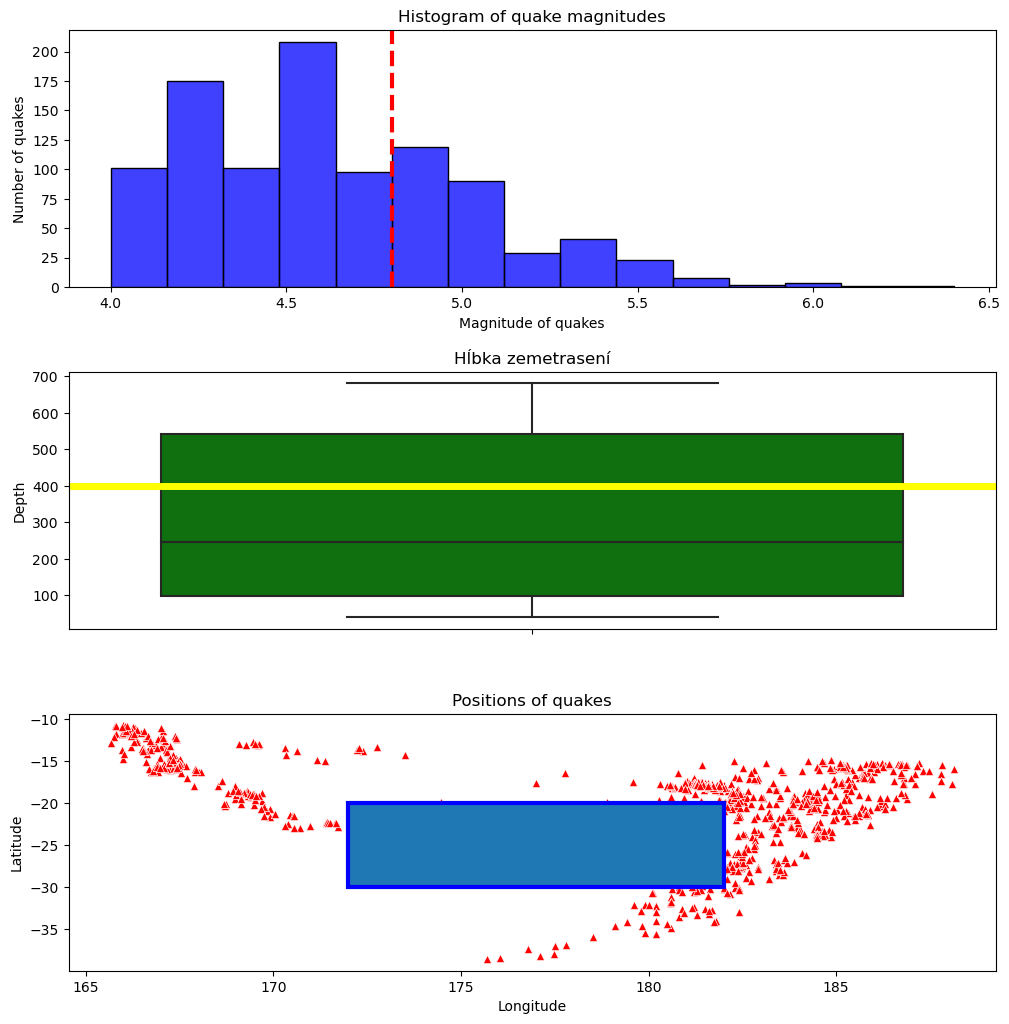

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as ptc
import seaborn as sns

df = pd.read_csv("https://peter.butka.website.tuke.sk/res/quakes.csv")

fig, axes = plt.subplots(3, 1, figsize=(10, 10))
fig.tight_layout(h_pad=4)

p = sns.histplot(data=df, x="mag", ax=axes[0], bins=15, color="blue")
p.set(xlabel='Magnitude of quakes',
       ylabel='Number of quakes',
       title='Histogram of quake magnitudes')
p.axvline(x=4.8, color="red", linestyle="--", linewidth=3)

p = sns.boxplot(data=df, y="depth", ax=axes[1], color="green")
p.set(title="Hĺbka zemetrasení", ylabel="Depth")
p.axhline(y=400, color="yellow", linewidth=5)

p = sns.scatterplot(data=df, x="long", y="lat", ax=axes[2], color="red", marker="^")
p.set(title="Positions of quakes", xlabel="Longitude", ylabel="Latitude")
rect = ptc.Rectangle((172, -30), 10, 10, linewidth=3, edgecolor="blue")
axes[2].add_patch(rect)

plt.show()